In [1]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [3]:
svm_clf.predict([[5.5,1.7]])

array([1.])

In [4]:
scaler=StandardScaler()
svm_clf1=LinearSVC(C=1,loss='hinge',random_state=42)
svm_clf2=LinearSVC(C=100,loss='hinge',random_state=42)

scaled_svm_clf1=Pipeline([
    ('sclaer',scaler),
    ('linear_svc',svm_clf1)
])
scaled_svm_clf2=Pipeline([
    ('sclaer',scaler),
    ('linear_svc',svm_clf2)
])
scaled_svm_clf1.fit(X,y)
scaled_svm_clf2.fit(X,y)

Pipeline(memory=None,
         steps=[('sclaer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=100, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [5]:
#스케일 되지 않은 파라미터로 변경
b1=svm_clf1.decision_function([-scaler.mean_/scaler.scale_])
b2=svm_clf2.decision_function([-scaler.mean_/scaler.scale_])
w1=svm_clf1.coef_[0]/scaler.scale_
w2=svm_clf2.coef_[0]/scaler.scale_
svm_clf1.intercept_=np.array([b1])
svm_clf2.intercept_=np.array([b2])
svm_clf1.coef_=np.array([w1])
svm_clf2.coef_=np.array([w2])

#t서포트 벡터 찾기
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

[4, 6, 0.8, 2.8]

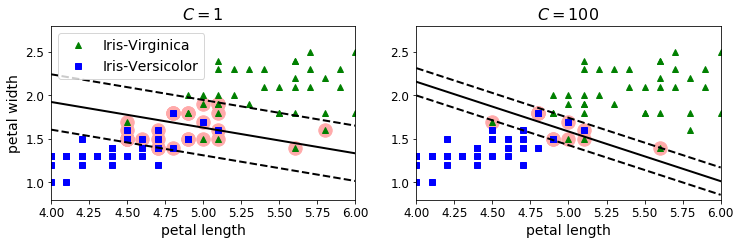

In [6]:

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])



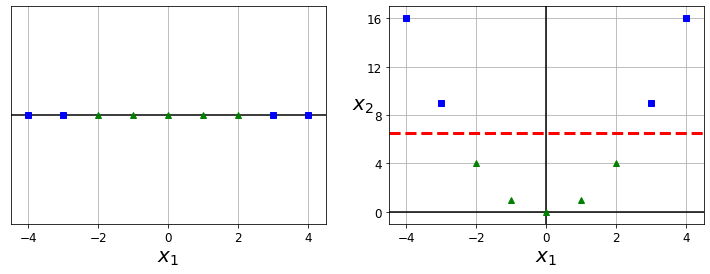

In [7]:
X1D=np.linspace(-4,4,9).reshape(-1,1)
X2D=np.c_[X1D,X1D**2]
y=np.array([0,0,1,1,1,1,1,0,0])

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

plt.show()

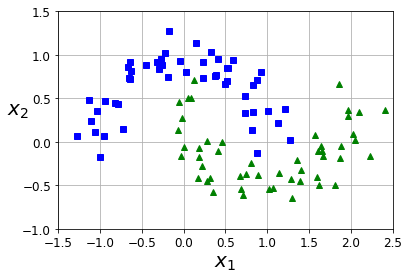

In [8]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.15,random_state=42)

def plot_dataset(X,y,axes):
    plt.plot(X[:,0][y==0],X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True,which='both')
    plt.xlabel(r"$x_1$",fontsize=20)
    plt.ylabel(r"$x_2$",fontsize=20,rotation=0)
    
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.show()

In [9]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features",PolynomialFeatures(degree=3)),
    ('scaler',StandardScaler()),
    ("svm_clf",LinearSVC(C=10,loss='hinge',max_iter=2000,random_state=42))
])

polynomial_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 LinearSVC(C=10, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=2000, multi_class='ovr',
                           penalty='l2', random_state=42, tol=0.0001,
                           verbose=0))],
         verbose=False)

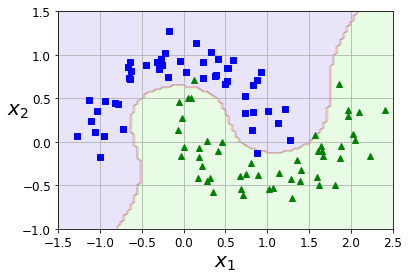

In [10]:
def plot_predictions(clf,axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    x0,x1=np.meshgrid(x0s,x1s)
    X=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg, alpha=0.1)
    
plot_predictions(polynomial_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

plt.show()

In [11]:
from sklearn.svm import SVC

poly_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='poly',degree=3,coef0=1,C=5))
])
poly_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=1, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [12]:
poly100_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel='poly',degree=10,coef0=100,C=5))
])
poly100_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, break_ties=False, cache_size=200, class_weight=None,
                     coef0=100, decision_function_shape='ovr', degree=10,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

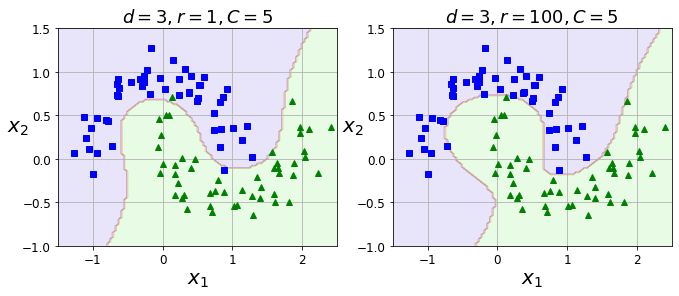

In [13]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=3, r=1, C=5$",fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r"$d=3, r=100, C=5$",fontsize=18)

plt.show()

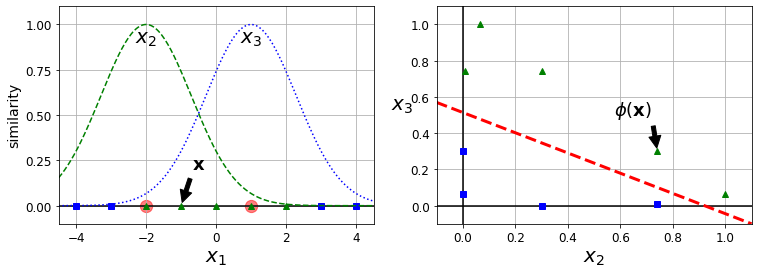

In [14]:
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark,axis=1)**2)

gamma=0.3

x1s=np.linspace(-4.5,4.5,200).reshape(-1,1)
x2s=gaussian_rbf(x1s,-2,gamma)
x3s=gaussian_rbf(x1s,1,gamma)

XK=np.c_[gaussian_rbf(X1D,-2,gamma),gaussian_rbf(X1D,1,gamma)]
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)


In [15]:
x1_example = X1D[3,0]
for landmark in (-2,1):
    k=gaussian_rbf(np.array([[x1_example]]),np.array([[landmark]]),gamma)
    print("Phi({},{})={}".format(x1_example,landmark,k))
    

Phi(-1.0,-2)=[0.74081822]
Phi(-1.0,1)=[0.30119421]


In [16]:
rbf_kernel_svm_clf=Pipeline([
    ("scaler",StandardScaler()),
    ("svm_clf",SVC(kernel="rbf",gamma=5,C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=0.001, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=5,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

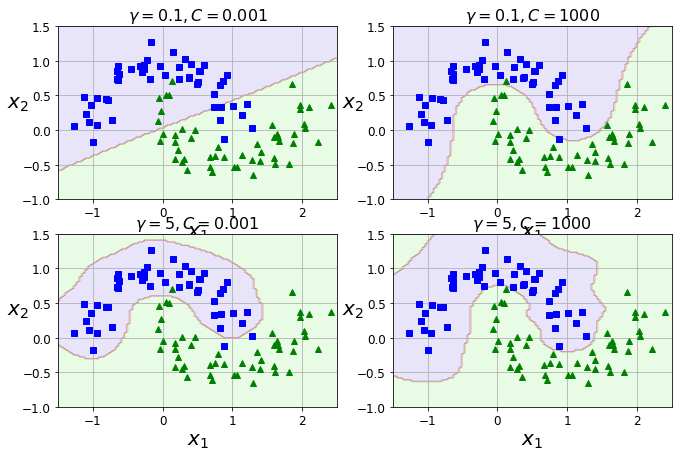

In [17]:
from sklearn.svm import SVC

gamma1,gamma2=0.1,5
C1,C2=0.001,1000
hyperparams = (gamma1,C1),(gamma1,C2),(gamma2,C1),(gamma2,C2)

svm_clfs=[]

for gamma,C in hyperparams:
    rbf_kernel_svm_clf=Pipeline([
        ("scaler",StandardScaler()),
        ("svm_clf",SVC(kernel='rbf',gamma=gamma,C=C))
    ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(11,7))

for i,svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_predictions(svm_clf,[-1.5,2.5,-1,1.5])
    plot_dataset(X,y,[-1.5,2.5,-1,1.5])
    gamma,C=hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma,C),fontsize=16)
    
plt.show()

In [18]:
np.random.seed(42)
m=50
X=2*np.random.rand(m,1)
y=(4+3*X+np.random.randn(m,1)).ravel()

In [19]:
from sklearn.svm import LinearSVR

svm_reg=LinearSVR(epsilon=1.5,random_state=42)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [20]:
svm_reg1=LinearSVR(epsilon=1.5,random_state=42)
svm_reg2=LinearSVR(epsilon=0.5,random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vectors(svm_reg,X,y):
    y_pred=svm_reg.predict(X)
    off_margin=(np.abs(y-y_pred)>=svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_=find_support_vectors(svm_reg1,X,y)
svm_reg2.support_=find_support_vectors(svm_reg2,X,y)

eps_x1=1
eps_y_pred=svm_reg1.predict([[eps_x1]])

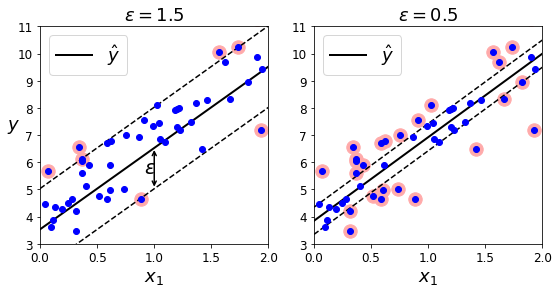

In [21]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)
    
    
plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_reg1,X,y,[0,2,3,11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )

plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
plt.show()

In [22]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel()

from sklearn.svm import SVR

svm_poly_reg=SVR(kernel='poly',gamma='auto',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X,y)

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
from sklearn.svm import SVR

svm_poly_reg1=SVR(kernel='poly',gamma='auto',degree=2,C=100,epsilon=0.1)
svm_poly_reg2=SVR(kernel='poly',gamma='auto',degree=2,C=0.01,epsilon=0.1)
svm_poly_reg1.fit(X,y)
svm_poly_reg2.fit(X,y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

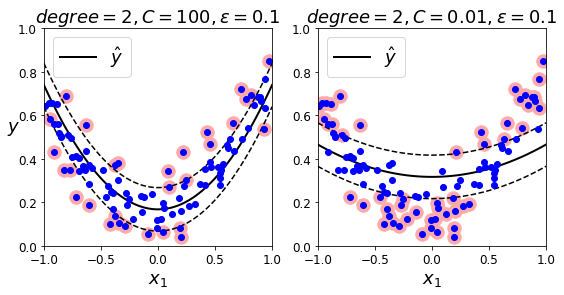

In [24]:
plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1,X,y,[-1,1,0,1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
plt.show()

In [25]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

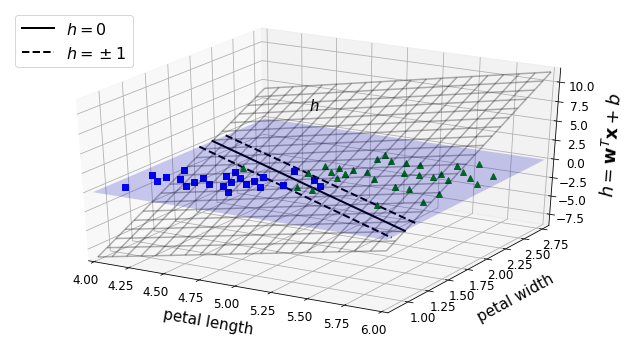

In [26]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "$h$", fontsize=15)
    ax.set_xlabel(r"petal length", fontsize=15, labelpad=15)
    ax.set_ylabel(r"petal width", fontsize=15, rotation=25, labelpad=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=10)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])


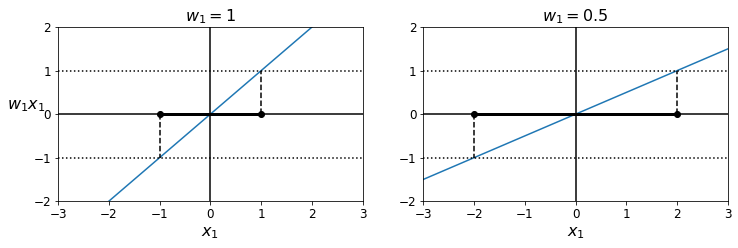

In [27]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w # 작은 가중치벡터가 라지 마진을 만든다

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)
    
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plot_2D_decision_function(1,0)
plt.subplot(122)
plot_2D_decision_function(0.5,0,ylabel=False)
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn import datasets

iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=(iris['target']==2).astype(np.float64)

svm_clf=SVC(kernel='linear',C=1)
svm_clf.fit(X,y)
svm_clf.predict([[5.3,1.3]])

array([1.])

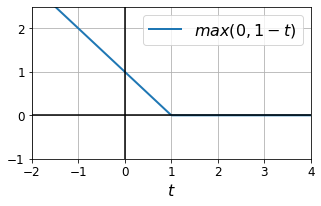

In [29]:
#hinge loss
t=np.linspace(-2,4,200)
h=np.where(1-t<0,0,1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t,h,linewidth=2,label="$max(0 , 1-t)$")
plt.grid(True,which='both')
plt.axhline(y=0,color='k')
plt.axvline(x=0,color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
plt.show()

In [30]:
# 배치 경사 하강법을 이용한 선형 SVM 분류기
X = iris["data"][:, (2, 3)] # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris-Virginica

In [31]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self,C=1,eta0=0.1,eta_d=10000,n_epochs=1000,random_state=None):
        self.C=C
        self.eta0=eta0
        self.n_epochs=n_epochs
        self.random_state=random_state
        self.eta_d=eta_d
        
    def eta(self,epoch):
        return self.eta0 / (epoch+self.eta_d)
    
    def fit(self,X,y):
        if self.random_state:
            np.random.seed(self.random_state)
        w=np.random.randn(X.shape[1],1)
        b=0
        
        m=len(X)
        t=y*2-1 # -1 if t==0,, +1  if t==1
        X_t=X*t
        self.Js=[]
        
        for epoch in range(self.n_epochs):
            support_vectors_idx=(X_t.dot(w)+t*b<1).ravel()
            X_t_sv=X_t[support_vectors_idx]
            t_sv=t[support_vectors_idx]
            
            J=1/2*np.sum(w*w)+self.C*(np.sum(1-X_t_sv.dot(w))-b*np.sum(t_sv))
            self.Js.append(J)
            
            w_gradient_vector=w-self.C*np.sum(X_t_sv,axis=0).reshape(-1,1)
            b_derivative=-C*np.sum(t_sv)
            
            w=w-self.eta(epoch)*w_gradient_vector
            b=b-self.eta(epoch)*b_derivative
            
        self.intercept_ = np.array([b])
        self.coef_=np.array([w])
        support_vectors_idx=(X_t.dot(w)+t*b<1).ravel()
        self.support_vectors_=X[support_vectors_idx]
        return self
    
    def decision_function(self,X):
        return X.dot(self.coef_[0])+self.intercept_[0]
    def predict(self,X):
        return (self.decision_function(X)>=0).astype(np.float64)
    
C=2
svm_clf=MyLinearSVC(C=C,eta0=10,eta_d=100,n_epochs=60000,random_state=2)
svm_clf.fit(X,y)
svm_clf.predict(np.array([[5,2],[4,1]]))

array([[1.],
       [0.]])

[4, 6, 0.8, 2.8]

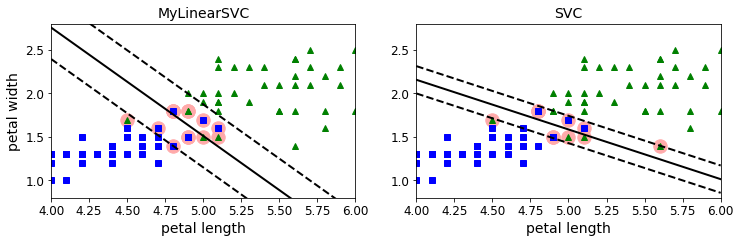

In [32]:
yr = y.ravel()
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris-Virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

[-12.52988101   1.94162342   1.84544824]


[4, 6, 0.8, 2.8]

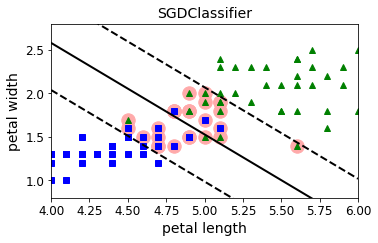

In [33]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha = 0.017, tol=1e-3, max_iter = 50, random_state=42)
sgd_clf.fit(X, y.ravel())

m = len(X)
t = y * 2 - 1  # -1 if t==0, +1 if t==1
X_b = np.c_[np.ones((m, 1)), X]  # 편향 x0=1을 추가
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]
sgd_clf.C = C

plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])

In [34]:
iris=datasets.load_iris()
X=iris["data"][:,(2,3)]
y=iris["target"]

setosa_or_versicolor=(y==0)|(y==1)
X=X[setosa_or_versicolor]
y=y[setosa_or_versicolor]

In [36]:
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [39]:
C=5
alpha=1/(C*len(X))

lin_clf=LinearSVC(loss='hinge',C=C,random_state=42)
svm_clf=SVC(kernel='linear',C=C)
sgd_clf=SGDClassifier(loss='hinge',learning_rate='constant',eta0=0.001,tol=1e-3,
                      alpha=alpha,max_iter=100000,random_state=42)

sclaer=StandardScaler()
X_scaled=scaler.fit_transform(X)

lin_clf.fit(X_scaled,y)
svm_clf.fit(X_scaled,y)
sgd_clf.fit(X_scaled,y)

SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [40]:
print("LinearSVD:                  ",lin_clf.intercept_,lin_clf.coef_)
print("SVC:                        ",svm_clf.intercept_,svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha),sgd_clf.intercept_,sgd_clf.coef_)

LinearSVD:                   [0.28474027] [[1.0536456  1.09903032]]
SVC:                         [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.117] [[0.77714169 0.72981762]]


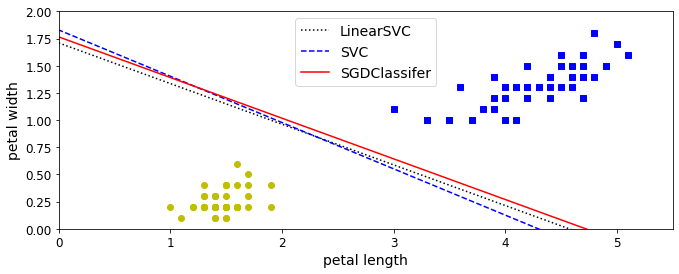

In [42]:
w1=-lin_clf.coef_[0,0]/lin_clf.coef_[0,1]
b1=-lin_clf.intercept_[0]/lin_clf.coef_[0,1]
w2=-svm_clf.coef_[0,0]/svm_clf.coef_[0,1]
b2=-svm_clf.intercept_[0]/svm_clf.coef_[0,1]
w3=-sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
b3=-sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]

#결정 경계를 원본 스케일로 변환
line1=scaler.inverse_transform([[-10,-10*w1+b1],[10,10*w1+b1]])
line2=scaler.inverse_transform([[-10,-10*w2+b2],[10,10*w2+b2]])
line3=scaler.inverse_transform([[-10,-10*w1+b3],[10,10*w1+b3]])

plt.figure(figsize=(11,4))
plt.plot(line1[:,0],line1[:,1],"k:",label="LinearSVC")
plt.plot(line2[:,0],line2[:,1],"b--",label="SVC")
plt.plot(line3[:,0],line3[:,1],"r-",label="SGDClassifer")
plt.plot(X[:,0][y==1],X[:,1][y==1],"bs") #iris-Versicolor
plt.plot(X[:,0][y==0],X[:,1][y==0],"yo") #iris-Setosa
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(loc='upper center',fontsize=14)
plt.axis([0,5.5,0,2])
plt.show()

# MNIST

In [100]:
# svm은 이진분류기라서 OvA전략을 이용해 10개의 숫자를 분류해야함
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X = mnist["data"]
y = mnist["target"]

X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]

In [101]:
# 많은 훈련 알고리즘은 샘플 순서에 민감하므로 순서를 섞는다
np.random.seed(42)
rnd_idx=np.random.permutation(60000)
X_train=X_train[rnd_idx]
y_train=y_train[rnd_idx]

In [45]:
#선형SVM분류기의 디폴트값은 OvA전략
lin_clf=LinearSVC(max_iter=10000,random_state=42)
lin_clf.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [46]:
from sklearn.metrics import accuracy_score

y_pred=lin_clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.8507166666666667

In [102]:
# 더 높은 정확도를 위해 스케일 조정
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled=sclaer.fit_transform(X_test.astype(np.float32))

In [51]:
lin_clf=LinearSVC(max_iter=10000,random_state=42)
lin_clf.fit(X_train_scaled,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [54]:
y_pred=lin_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

0.92685

In [57]:
svm_clf=SVC(gamma='auto',decision_function_shape='ovr')
svm_clf.fit(X_train_scaled[:10000],y_train[:10000])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9476

In [103]:
#교차 검증을 사용한 랜덤서치로 하이퍼파라미터 튜닝
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions={"gamma":reciprocal(0.001,0.1),"C":uniform(1,10)}
rnd_search_cv=RandomizedSearchCV(svm_clf,param_distributions,cv=3,n_iter=10,verbose=2,n_jobs=-1)
rnd_search_cv.fit(X_train_scaled[:1000],y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.2s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C02C90508>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C02C8E8C8>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [104]:
rnd_search_cv.best_estimator_

SVC(C=6.335534109540218, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0011263118134606108, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [105]:
rnd_search_cv.best_score_

0.8680087272901643

In [106]:
rnd_search_cv.best_estimator_.fit(X_train_scaled,y_train)

SVC(C=6.335534109540218, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.0011263118134606108, kernel='rbf', max_iter=-1, probability=False,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [109]:

y_pred = rnd_search_cv.best_estimator_.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9973166666666666

In [110]:
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9718

# 캘리포니아 주택가격 데이터셋 훈련

In [72]:
from sklearn.datasets import fetch_california_housing

housing=fetch_california_housing()
X=housing['data']
y=housing['target']

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [79]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [80]:
from sklearn.svm import LinearSVR

lin_svr=LinearSVR(max_iter=10000,random_state=42)
lin_svr.fit(X_train_scaled,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=42, tol=0.0001, verbose=0)

In [83]:
from sklearn.metrics import mean_squared_error

y_pred=lin_svr.predict(X_train_scaled)
mse=mean_squared_error(y_train,y_pred)
mse

0.952627996421772

In [84]:
np.sqrt(mse)

0.976026637147661

In [90]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform
# gamma 와 C 의 적절한 값을 찾기 위해 교차검증을 사용한 랜덤서치 적용
param_distributions={"gamma":reciprocal(0.001,0.1),"C":uniform(1,10)}
rnd_search_cv=RandomizedSearchCV(SVR(),param_distributions,cv=3,n_iter=10,verbose=2,random_state=42,n_jobs=-1)
rnd_search_cv.fit(X_train_scaled,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C02C710C8>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000019C02C71D08>},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [91]:
rnd_search_cv.best_estimator_

SVR(C=4.745401188473625, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma=0.07969454818643928, kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [95]:
y_pred=rnd_search_cv.best_estimator_.predict(X_train_scaled)
mse=mean_squared_error(y_train,y_pred)
np.sqrt(mse)

0.5727524770785357

In [99]:
#선형모델보다 RMSE가 훨씬 작으므로 더 나은 모델임을 알 수 있다.
y_pred = rnd_search_cv.best_estimator_.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
np.sqrt(mse)

0.5929168385528746